In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite, cycles

# Q1

In [2]:
with open('nutrients1.csv', 'r') as f:
    csv_reader = csv.reader(f)
    G = nx.Graph(csv_reader)

In [3]:
data = pd.read_csv('nutrients1.csv')
data.head()

,A,carrots
0,A,eggs
1,A,fatty fish
2,A,green leafy vegs
3,A,liver
4,A,milk


In [4]:
mapping = {node: node.title() for node in G if isinstance (node,str)}

In [5]:
nx.relabel_nodes(G,mapping, copy=False)

In [6]:
print(G.nodes())

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Riboflavin', 'Niacin', 'Folates', 'Spinach', 'Poultry', 'Shellfish', 'Thiamin', 'Veg Oils', 'Yogurt']


In [7]:
print(G["Carrots"])

{'A': {}, 'C': {}}


In [8]:
# Check if G is bipartite or not
# If yes, no need to manually create another graph

print(nx.is_bipartite(G))

True


In [9]:
nutrients = set(('A', 'Cu', 'B6', 'D', 'Riboflavin', 'Ca', 'C', 'Se', 'Mn','Thiamin', 'Zn', 'Niacin', 'E', 'B12', 'Folates'))
food = set([node for node in G.nodes() if node not in nutrients])

In [10]:
print(nx.spring_layout(G))

{'A': array([-0.08550863, -0.15119385]), 'B12': array([ 0.13836632, -0.21586878]), 'B6': array([0.45261746, 0.07705327]), 'C': array([-0.62604855, -0.24308482]), 'Ca': array([-0.47928657, -0.44977312]), 'Cu': array([0.32486441, 0.36618667]), 'D': array([ 0.12614575, -0.46873135]), 'E': array([-0.35404872,  0.32698599]), 'Mn': array([-0.25487161,  0.30726358]), 'Se': array([0.65778072, 0.27142703]), 'Zn': array([0.3237761 , 0.19704865]), 'Carrots': array([-0.38141839, -0.29262968]), 'Eggs': array([-0.02431407, -0.26640619]), 'Fatty Fish': array([ 0.16249447, -0.10731788]), 'Green Leafy Vegs': array([-0.37162119, -0.04262215]), 'Liver': array([0.39255466, 0.04586846]), 'Milk': array([-0.12453332, -0.35149132]), 'Tomatoes': array([-0.41341567, -0.20404975]), 'Asparagus': array([ 0.74908523, -0.00688704]), 'Beans': array([0.45152151, 0.34001878]), 'Kidneys': array([0.53727137, 0.29534185]), 'Potatoes': array([0.48403184, 0.23693667]), 'Pumpkins': array([-0.92136961, -0.28257035]), 'Broccol

Name: 
Type: Graph
Number of nodes: 41
Number of edges: 74
Average degree:   3.6098


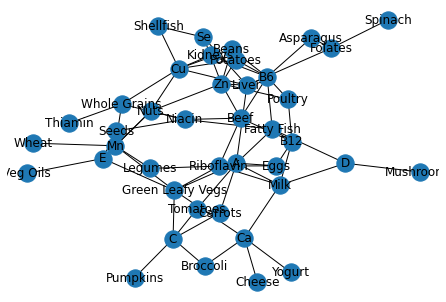

In [11]:
print(nx.info(G))
plt.figure()
nx.draw(G, with_labels = True)

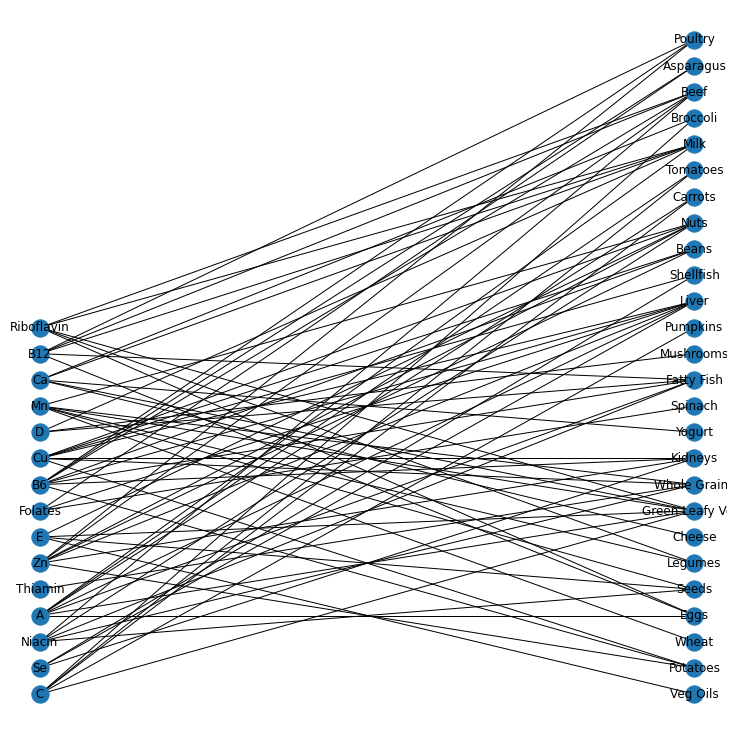

In [12]:
# To properly plot the bipartite graph, what we can do is create our own positional layout with the nutrients on one side and food on other for better visualization and understanding

pos = dict()
for i, nut in enumerate(list(nutrients)):
    pos[nut] = np.array([1, 1 + i])

for i, foo in enumerate(list(food)):
    pos[foo] = np.array([5, 1 + i])
plt.figure(figsize = (10, 10))
nx.draw(G, with_labels = True, pos = pos)
plt.show()

In [13]:
nutrient_dict = {node: (node in nutrients) for node in G}
nx.set_node_attributes(G, name = 'nutrient', values = nutrient_dict)

In [14]:
nut = bipartite.weighted_projected_graph(G, nutrients)

In [15]:
print(nut.edges(data=True))

# Here the weights represent the number of foods which have both the nutrients

[('C', 'A', {'weight': 3}), ('C', 'E', {'weight': 1}), ('C', 'Mn', {'weight': 1}), ('C', 'Ca', {'weight': 2}), ('C', 'Riboflavin', {'weight': 1}), ('Se', 'Folates', {'weight': 1}), ('Se', 'Zn', {'weight': 2}), ('Se', 'A', {'weight': 1}), ('Se', 'B6', {'weight': 2}), ('Se', 'Cu', {'weight': 3}), ('Niacin', 'Zn', {'weight': 2}), ('Niacin', 'A', {'weight': 1}), ('Niacin', 'Thiamin', {'weight': 1}), ('Niacin', 'E', {'weight': 2}), ('Niacin', 'B6', {'weight': 2}), ('Niacin', 'Cu', {'weight': 2}), ('Niacin', 'D', {'weight': 1}), ('Niacin', 'Mn', {'weight': 3}), ('Niacin', 'B12', {'weight': 2}), ('Niacin', 'Riboflavin', {'weight': 1}), ('A', 'Zn', {'weight': 1}), ('A', 'Folates', {'weight': 1}), ('A', 'E', {'weight': 1}), ('A', 'B6', {'weight': 2}), ('A', 'Cu', {'weight': 1}), ('A', 'D', {'weight': 2}), ('A', 'Mn', {'weight': 1}), ('A', 'Ca', {'weight': 2}), ('A', 'B12', {'weight': 3}), ('A', 'Riboflavin', {'weight': 3}), ('Thiamin', 'Mn', {'weight': 1}), ('Thiamin', 'Cu', {'weight': 1}), ('Z

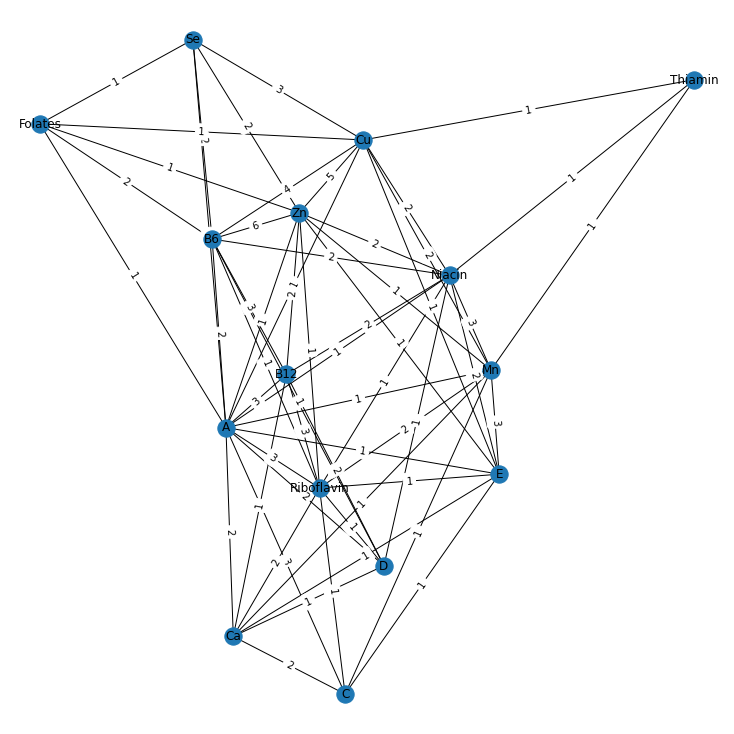

In [16]:
layout = nx.spring_layout(nut)
plt.figure(figsize = (10, 10))
nx.draw(nut, pos = layout, with_labels = True)
nx.draw_networkx_edge_labels(nut, edge_labels=nx.get_edge_attributes(nut,'weight'), pos=layout)
plt.show()

[('Veg Oils', 'Nuts', {'weight': 1}), ('Veg Oils', 'Seeds', {'weight': 1}), ('Veg Oils', 'Green Leafy Vegs', {'weight': 1}), ('Potatoes', 'Kidneys', {'weight': 3}), ('Potatoes', 'Nuts', {'weight': 2}), ('Potatoes', 'Shellfish', {'weight': 1}), ('Potatoes', 'Fatty Fish', {'weight': 1}), ('Potatoes', 'Beans', {'weight': 3}), ('Potatoes', 'Beef', {'weight': 2}), ('Potatoes', 'Liver', {'weight': 3}), ('Potatoes', 'Asparagus', {'weight': 1}), ('Potatoes', 'Poultry', {'weight': 2}), ('Potatoes', 'Whole Grains', {'weight': 1}), ('Wheat', 'Nuts', {'weight': 1}), ('Wheat', 'Seeds', {'weight': 1}), ('Wheat', 'Legumes', {'weight': 1}), ('Wheat', 'Green Leafy Vegs', {'weight': 1}), ('Wheat', 'Whole Grains', {'weight': 1}), ('Eggs', 'Milk', {'weight': 3}), ('Eggs', 'Liver', {'weight': 1}), ('Eggs', 'Fatty Fish', {'weight': 2}), ('Eggs', 'Legumes', {'weight': 1}), ('Eggs', 'Carrots', {'weight': 1}), ('Eggs', 'Green Leafy Vegs', {'weight': 2}), ('Eggs', 'Beef', {'weight': 2}), ('Eggs', 'Tomatoes', {'

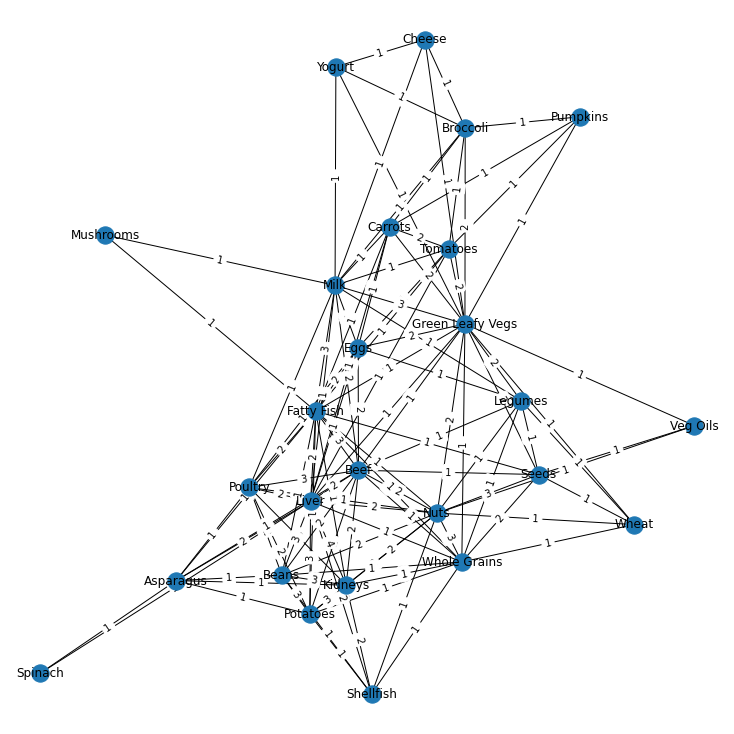

In [17]:
#Similarly for food


foo = bipartite.weighted_projected_graph(G, food)
print(foo.edges(data=True))

layout = nx.spring_layout(foo)
plt.figure(figsize = (10, 10))
nx.draw(foo, pos = layout, with_labels = True)
nx.draw_networkx_edge_labels(foo, edge_labels=nx.get_edge_attributes(foo,'weight'), pos=layout)
plt.show()

# Q2

In [18]:
with open('directed.csv', 'r') as f:
    csv_reader = csv.reader(f)
    G = nx.DiGraph(csv_reader)

Name: 
Type: DiGraph
Number of nodes: 19
Number of edges: 36
Average in degree:   1.8947
Average out degree:   1.8947


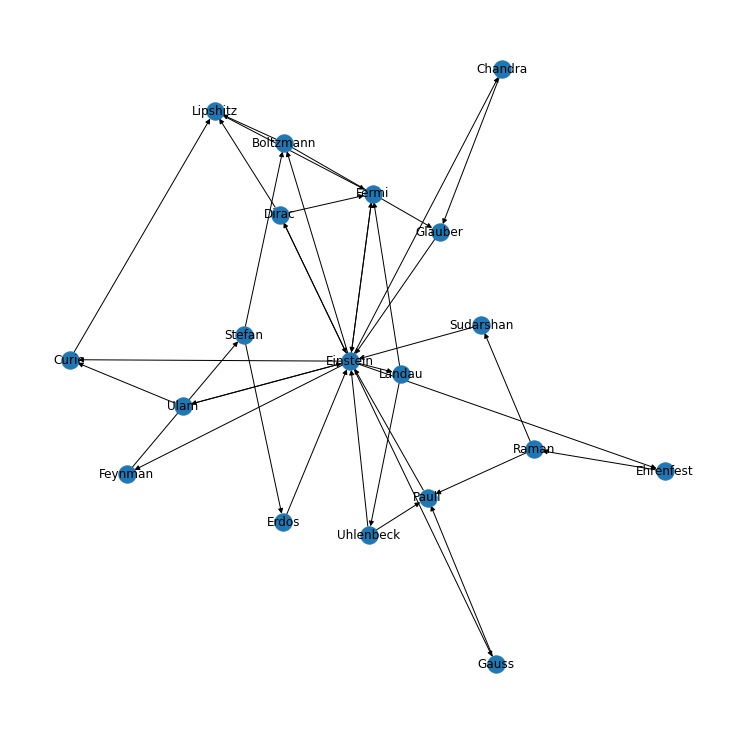

In [19]:
print(nx.info(G))
plt.figure(figsize = (10, 10))
nx.draw(G, with_labels = True)
plt.show()

In [20]:
# Check if the given graph is acyclic. This is clearly visible from the figure that the given graph is not acyclic

print(nx.is_directed_acyclic_graph(G))

False


In [21]:
# Now that we know the the graph is not acyclic, we can use cycles of networkx to get the cyclic edges and remove them

while not nx.is_directed_acyclic_graph(G):
    cycle = cycles.find_cycle(G)[0]
    G.remove_edge(*cycle)

Is Acyclic:  True


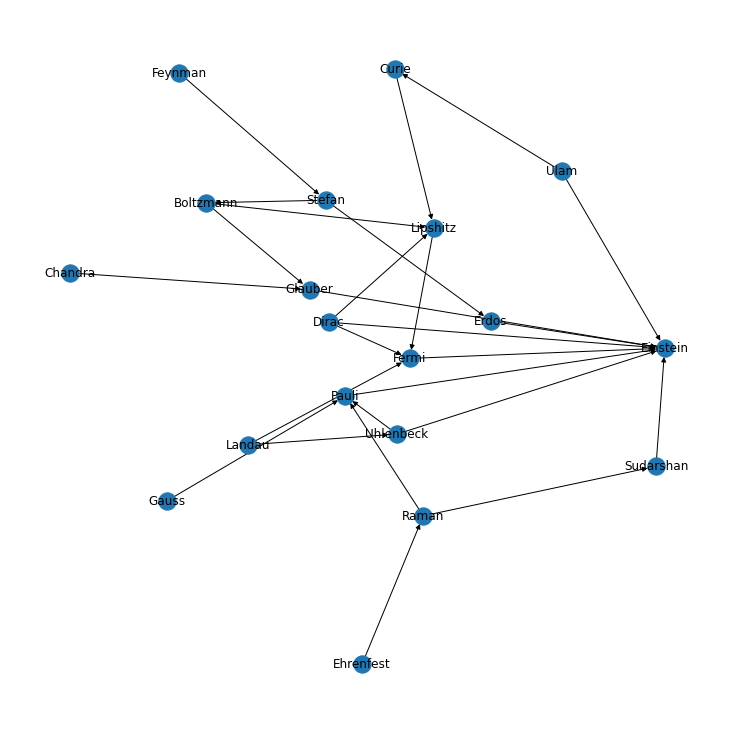

In [22]:
print("Is Acyclic: ",nx.is_directed_acyclic_graph(G))
plt.figure(figsize = (10, 10))
nx.draw(G, with_labels = True)
plt.show()

In [23]:
# To get the cocitation and bibliopgraphic coupling, we need to draw get the adjacency matrix first

adj_matrix = nx.adjacency_matrix(G).todense().T

In [24]:
print(adj_matrix)

[[0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [25]:
cocitation_matrix = adj_matrix * adj_matrix.T
print(cocitation_matrix)

[[8 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
 [1 3 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [26]:
bibliographic_matrix = adj_matrix.T * adj_matrix
print(bibliographic_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 1 3 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 2 0 1 0 0 1 1 0 1 1 0 1 1]
 [0 0 1 0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]
 [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 2]]


In [27]:
cocitation_graph = nx.from_numpy_matrix(cocitation_matrix)
labels =  dict(zip(cocitation_graph, G))
print(labels)

{0: 'Einstein', 1: 'Fermi', 2: 'Dirac', 3: 'Feynman', 4: 'Stefan', 5: 'Landau', 6: 'Uhlenbeck', 7: 'Boltzmann', 8: 'Glauber', 9: 'Curie', 10: 'Lipshitz', 11: 'Gauss', 12: 'Pauli', 13: 'Ehrenfest', 14: 'Raman', 15: 'Erdos', 16: 'Chandra', 17: 'Sudarshan', 18: 'Ulam'}


In [28]:
cocitation_graph = nx.relabel_nodes(cocitation_graph,labels, copy=False)

In [29]:
print(nx.info(cocitation_graph))

Name: 
Type: Graph
Number of nodes: 19
Number of edges: 21
Average degree:   2.2105


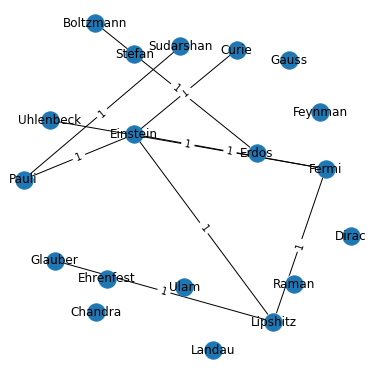

In [30]:
pos=nx.spring_layout(cocitation_graph, k = 1, iterations = 20)

plt.figure(figsize=(5, 5))
nx.draw(cocitation_graph, with_labels = True, pos = pos)
nx.draw_networkx_edge_labels(cocitation_graph, edge_labels=nx.get_edge_attributes(cocitation_graph,'weight'), pos=pos)
plt.show()

{0: 'Einstein', 1: 'Fermi', 2: 'Dirac', 3: 'Feynman', 4: 'Stefan', 5: 'Landau', 6: 'Uhlenbeck', 7: 'Boltzmann', 8: 'Glauber', 9: 'Curie', 10: 'Lipshitz', 11: 'Gauss', 12: 'Pauli', 13: 'Ehrenfest', 14: 'Raman', 15: 'Erdos', 16: 'Chandra', 17: 'Sudarshan', 18: 'Ulam'}
Name: 
Type: Graph
Number of nodes: 19
Number of edges: 56
Average degree:   5.8947


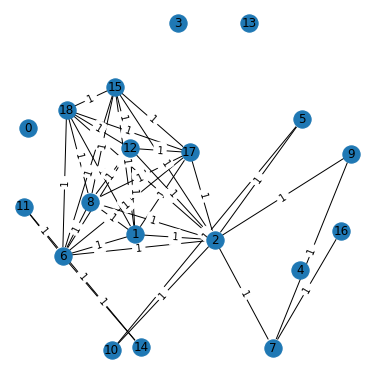

In [31]:
bibliographic_graph = nx.from_numpy_matrix(bibliographic_matrix)
labels =  dict(zip(bibliographic_graph, G))
print(labels)

print(nx.info(bibliographic_graph))

pos=nx.spring_layout(bibliographic_graph, k = 1, iterations = 20)

plt.figure(figsize=(5, 5))
nx.draw(bibliographic_graph, with_labels = True, pos = pos)
nx.draw_networkx_edge_labels(bibliographic_graph, edge_labels=nx.get_edge_attributes(bibliographic_graph,'weight'), pos=pos)
plt.show()